<a href="https://colab.research.google.com/github/RegiTelma/NLP/blob/main/DSR_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models,layers

In [ ]:
(dataset_train_original, dataset_validate_original, dataset_test_original), info = tfds.load(
    "mnist",
    split=["train","test[:50%]","test[50%:]"], #train,validate,test. validation set by splitting test set
    as_supervised=True,
    with_info=True
)
info

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='/root/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)

It is always preferred to have around 10000 of minimum train set if u do from scratch.
And if with transfer learning it is 1000 minimum train set.
Always shuffle data while loading

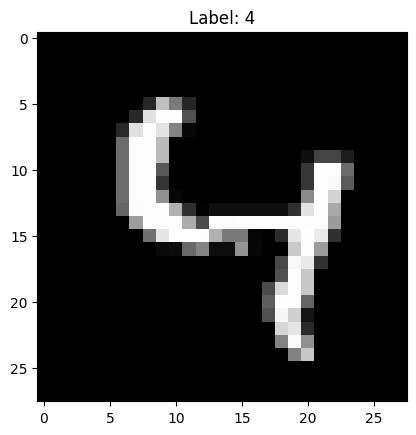

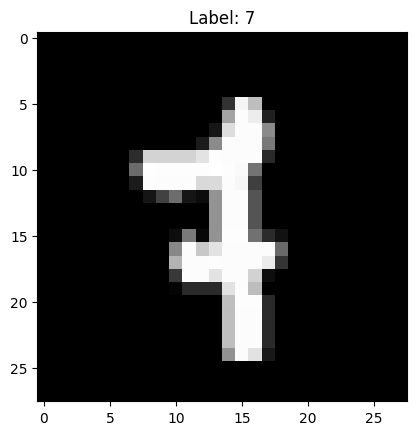

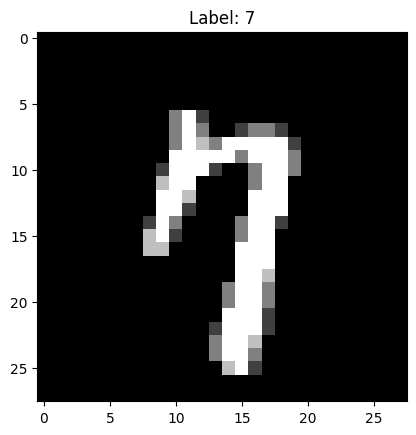

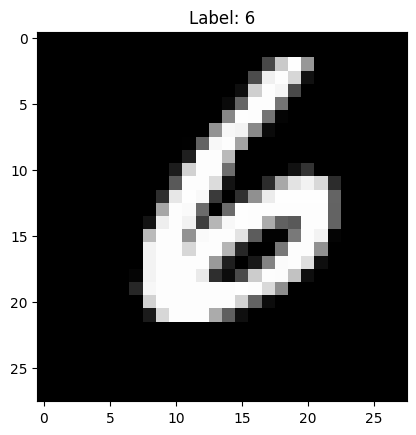

In [ ]:
for x,y in dataset_train_original.shuffle(60000).take(4):
  plt.imshow(x, cmap="gray")
  plt.title(f"Label: {y}")
  plt.show() #if u wanna see all the 4 labels

In [ ]:
!nvidia-smi

Mon Aug  7 10:24:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    31W /  70W |    389MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
dataset_train_original.shuffle(60000).take(4) #Chaining pattern

<_TakeDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

#Pipelines

lambda-anonymous function-function without name.

map-applies a function.

normalize and type casting are done on line 2

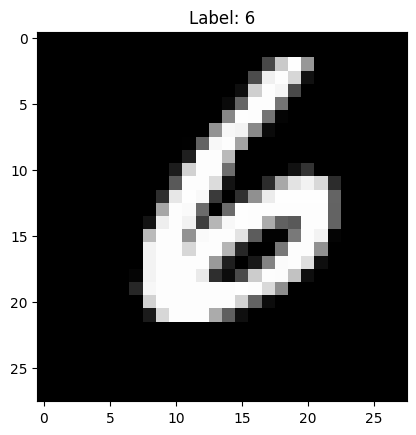

<dtype: 'float32'>


In [ ]:
def encode(image,label):
  image= tf.image.convert_image_dtype(image, tf.float32)
  return image,label

dataset=dataset_train_original.map(lambda image, label: encode(image,label))

for image, label in dataset.take(1):
  plt.imshow(x, cmap="gray")
  plt.title(f"Label: {y}")
  plt.show()
  print(image.dtype)

60_000 underscore is just for reading purpose

(128,)-tuple

cache-to make it faster since we need to take dataset again and again

line 3 is similar to line 5,6,7- 5,6,7 is chaining

In [ ]:
dataset_train=dataset_train_original.map(lambda x,y: encode(x,y)).cache().shuffle(60_000).batch(128)

dataset_validate=dataset_validate_original.map(lambda x,y: encode(x,y)).cache().batch(128)

dataset_test=dataset_test_original.map(lambda x,y: encode(x,y))
dataset_test=dataset_test.cache()
dataset_test=dataset_test.batch(128)


#for x,y in dataset_train.take(1):
#  print(x.shape)
#  print(y.shape)

#Model

creating neural network

"None" in the output shape is the batch size

1st layer is with Flatten-reshape to one dimension

2nd layer - Dense

activation function-relu,softmax,sigmoid,tanh

relu-makes all -ve to +ve

softmax-all the numbers will be btwn 0 to 1 and all those will adds upto 1

In [ ]:
model=models.Sequential()
model.add(layers.Flatten(input_shape=(28,28,1)))
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(10,activation="softmax"))
model.summary()

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 64)                50240     
                                                                 
 dense_12 (Dense)            (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
784*64+64


50240

In [ ]:
loss,accuracy= model.evaluate(dataset_train)
loss,accuracy

469/469 [==============================] - 1s 3ms/step - loss: 2.3489 - accuracy: 0.0732


(2.348865270614624, 0.07316666841506958)

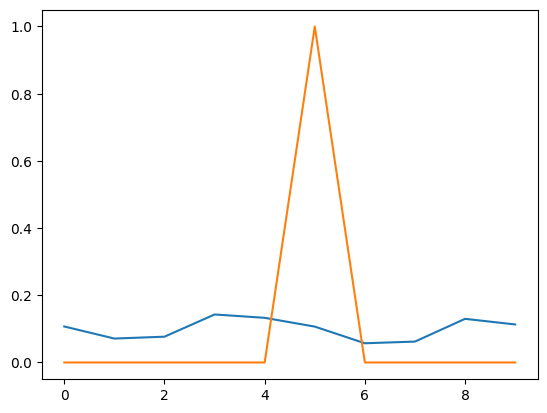

In [ ]:
for x_batch,y_batch in dataset_train.take(1):
  prediction=model.predict(x_batch,verbose=0)
  index=0
  plt.plot(prediction[index])
  y_batch_onehot=tf.keras.utils.to_categorical(y_batch)
  plt.plot(y_batch_onehot[index])

train

In [ ]:
history=model.fit(
    dataset_train,
    epochs=50,
    validation_data=dataset_validate
)

Epoch 1/50
469/469 [==============================] - 5s 5ms/step - loss: 0.4220 - accuracy: 0.8846 - val_loss: 0.2516 - val_accuracy: 0.9272
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.2141 - accuracy: 0.9393 - val_loss: 0.1935 - val_accuracy: 0.9432
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1645 - accuracy: 0.9538 - val_loss: 0.1565 - val_accuracy: 0.9550
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1353 - accuracy: 0.9610 - val_loss: 0.1354 - val_accuracy: 0.9610
Epoch 5/50
469/469 [==============================] - 2s 3ms/step - loss: 0.1141 - accuracy: 0.9673 - val_loss: 0.1217 - val_accuracy: 0.9650
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0982 - accuracy: 0.9723 - val_loss: 0.1117 - val_accuracy: 0.9672
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0864 - accuracy: 0.9742 - val_loss: 0.1110 - val_accuracy: 0.9664
Epoch 

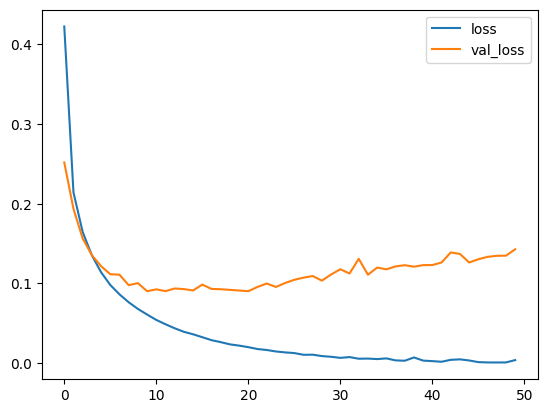

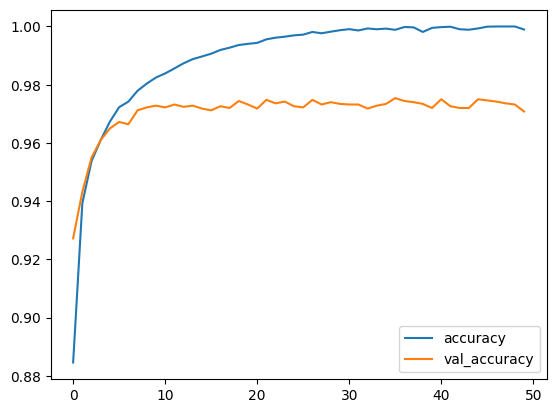

In [ ]:
model.history.history.keys()

def render_history(history):
  assert isinstance(history,dict), f"Expected dict, but got {type(history)}"

  plt.plot(history["loss"],label="loss")
  plt.plot(history["val_loss"],label="val_loss")
  plt.legend()
  plt.show()

  plt.plot(history["accuracy"],label="accuracy")
  plt.plot(history["val_accuracy"],label="val_accuracy")
  plt.legend()
  plt.show()

render_history(model.history.history)

# Saving the model

In [ ]:
model.save("model.h5")

# Loading the model

In [ ]:
loaded_model=models.load_model("model.h5")
loaded_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 64)                50240     
                                                                 
 dense_12 (Dense)            (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


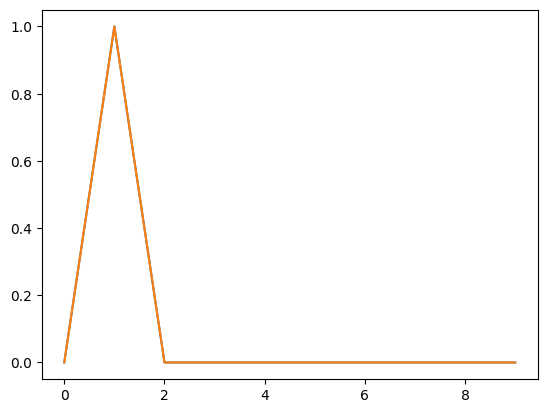

In [ ]:
for x_batch,y_batch in dataset_train.take(1):
  prediction=model.predict(x_batch,verbose=0)
  index=0
  plt.plot(prediction[index])
  y_batch_onehot=tf.keras.utils.to_categorical(y_batch)
  plt.plot(y_batch_onehot[index])

In [ ]:
loss,accuracy= model.evaluate(dataset_train)
loss,accuracy

469/469 [==============================] - 2s 4ms/step - loss: 0.0104 - accuracy: 0.9965


(0.010407837107777596, 0.9965000152587891)